In [48]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder


# from sklearn.tree import DecisionTreeClassifier

In [2]:
from sklearn.tree import DecisionTreeClassifier

In [3]:
employees_df = pd.read_csv('datasets/employees/employees_synthetic.csv')

In [4]:
employees_df

,employee_id,department,sub-department,first_level_manager,second_level_manager,third_level_manager,fourth_level_manager,job_level,gender,sexual_orientation,...,location_city,marital_status,employment_status,salary,hire_date,term_date,tenure,term_type,term_reason,active_status
0,5641543884,HR,Training,7.305454e+09,2.663916e+09,7.133405e+09,NaN,Individual Contributor,Female,Heterosexual,...,Los Angeles,Single,Full Time,51815,2018-12-17,NaN,49,NaN,NaN,1
1,1827262027,Software,Technical Support,3.520177e+09,1.383109e+09,4.520268e+09,NaN,Individual Contributor,Male,Heterosexual,...,Boston,Single,Full Time,81291,2016-10-14,NaN,76,NaN,NaN,1
2,8031094893,HR,Benefits,2.757247e+07,6.712864e+09,2.509047e+09,NaN,Individual Contributor,Female,Heterosexual,...,Dallas,Single,Full Time,80893,2017-08-15,NaN,66,NaN,NaN,1
3,8578520737,HR,Training,8.648367e+09,7.040763e+09,NaN,NaN,Team Lead,Male,Heterosexual,...,Denver,Married,Full Time,74519,2020-07-07,NaN,30,NaN,NaN,1
4,7581210340,HR,Recruiting,2.609320e+08,5.662655e+09,6.032514e+09,NaN,Individual Contributor,Female,Heterosexual,...,Charlotte,Single,Full Time,54835,2017-10-28,NaN,63,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4826,464057640,Operations,Project Management,2.200640e+09,8.488925e+09,6.635439e+08,NaN,Individual Contributor,Female,Heterosexual,...,Philadelphia,Married,Full Time,63735,2019-03-16,NaN,46,NaN,NaN,1
4827,196002032,Marketing,Advertising,6.479530e+08,6.441861e+08,4.230864e+09,NaN,Individual Contributor,Female,Heterosexual,...,Los Angeles,Single,Full Time,87063,2017-02-24,NaN,71,NaN,NaN,1
4828,2488511938,Software,Software Development,5.840654e+09,9.850783e+09,1.696262e+09,NaN,Individual Contributor,Male,Heterosexual,...,Phoenix,Single,Full Time,107528,2012-12-25,2014-01-12,13,Involuntary,Performance,0
4829,2333229595,Sales,Sales Operations,9.761636e+09,NaN,NaN,NaN,Manager,Male,Heterosexual,...,Phoenix,Married,Full Time,82167,2019-05-01,NaN,45,NaN,NaN,1


In [5]:
employees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4831 entries, 0 to 4830
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           4831 non-null   int64  
 1   department            4831 non-null   object 
 2   sub-department        4831 non-null   object 
 3   first_level_manager   4706 non-null   float64
 4   second_level_manager  4260 non-null   float64
 5   third_level_manager   3507 non-null   float64
 6   fourth_level_manager  0 non-null      float64
 7   job_level             4831 non-null   object 
 8   gender                4831 non-null   object 
 9   sexual_orientation    4831 non-null   object 
 10  race                  4831 non-null   object 
 11  age                   4831 non-null   int64  
 12  education             4736 non-null   object 
 13  location              4831 non-null   object 
 14  location_city         4831 non-null   object 
 15  marital_status       

In [6]:
employees_df['education']

0          Master's degree
1        Bachelor's degree
2          Master's degree
3        Bachelor's degree
4        Bachelor's degree
               ...        
4826    Associate's degree
4827     Bachelor's degree
4828     Bachelor's degree
4829     Bachelor's degree
4830     Bachelor's degree
Name: education, Length: 4831, dtype: object

In [7]:
employees_df[employees_df['education'].isna()]

,employee_id,department,sub-department,first_level_manager,second_level_manager,third_level_manager,fourth_level_manager,job_level,gender,sexual_orientation,...,location_city,marital_status,employment_status,salary,hire_date,term_date,tenure,term_type,term_reason,active_status
19,1855416469,Customer Service,Account Management,8.780882e+09,NaN,NaN,NaN,Manager,Male,Heterosexual,...,Chicago,Single,Full Time,69932,2016-08-15,2017-09-09,13,Voluntary,Better salary,0
26,6608504776,Procurement,Supply Chain,5.427032e+09,NaN,NaN,NaN,Manager,Female,Heterosexual,...,Dallas,Single,Full Time,86744,2020-12-14,NaN,25,NaN,NaN,1
47,3973904578,Finance,Auditing,1.561313e+09,1.102906e+08,3.578501e+09,NaN,Individual Contributor,Male,Heterosexual,...,Chicago,Single,Full Time,91551,2017-08-20,NaN,65,NaN,NaN,1
72,1462015104,Software,QA,NaN,NaN,NaN,NaN,Director,Male,Heterosexual,...,Austin,Single,Full Time,103400,2020-11-11,NaN,26,NaN,NaN,1
134,9938747514,Sales,Sales Operations,1.088698e+09,2.342423e+09,NaN,NaN,Team Lead,Male,Heterosexual,...,Philadelphia,Single,Contract,80323,2021-01-05,NaN,24,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4635,3449179712,HR,Recruiting,5.884235e+09,NaN,NaN,NaN,Manager,Female,Heterosexual,...,San Jose,Married,Full Time,102755,2016-05-20,NaN,81,NaN,NaN,1
4692,6969968454,Finance,Accounting,6.040189e+09,7.383587e+09,4.820450e+09,NaN,Individual Contributor,Female,Heterosexual,...,Los Angeles,Single,Full Time,93366,2019-10-25,NaN,39,NaN,NaN,1
4709,2555651079,Marketing,Public Relations,1.947589e+09,1.420080e+09,1.912935e+09,NaN,Individual Contributor,Male,Heterosexual,...,Indianapolis,Single,Full Time,67068,2015-07-06,NaN,91,NaN,NaN,1
4751,6221802157,Legal,Corporate Law,1.581830e+09,5.706542e+09,3.229785e+09,NaN,Individual Contributor,Female,Heterosexual,...,Columbus,Single,Full Time,116228,2015-11-27,NaN,87,NaN,NaN,1


In [8]:
employees_df['education'].replace([np.nan, "Associate's degree", "Bachelor's degree", "Master's degree"],
                        [0, 1, 2, 3], inplace=True)

In [9]:
employees_df['education']

0       3
1       2
2       3
3       2
4       2
       ..
4826    1
4827    2
4828    2
4829    2
4830    2
Name: education, Length: 4831, dtype: int64

In [10]:
employees_df['department'].unique()

array(['HR', 'Software', 'Marketing', 'R&D', 'Legal', 'Finance', 'Sales',
       'Customer Service', 'Administration', 'Procurement', 'Operations',
       'Product Development'], dtype=object)

In [11]:
employees_df['age'].describe()

count    4831.000000
mean       33.583316
std         8.874326
min        20.000000
25%        27.000000
50%        33.000000
75%        38.000000
max        65.000000
Name: age, dtype: float64

In [12]:
bins= [20,25,30,35,40,45,50,55,60,65]
labels = ['[20-24]','[25-29]','[30-34]','[35-39]','[40-44]','[45-49]','[50-54]','[55-59]','[60-64]']
employees_df['age_group'] = pd.cut(employees_df['age'], bins=bins, labels=labels, right=False)

In [13]:
employees_df[['age', 'age_group']]

,age,age_group
0,35,[35-39]
1,21,[20-24]
2,34,[30-34]
3,24,[20-24]
4,29,[25-29]
...,...,...
4826,39,[35-39]
4827,38,[35-39]
4828,34,[30-34]
4829,35,[35-39]


<AxesSubplot:xlabel='department'>

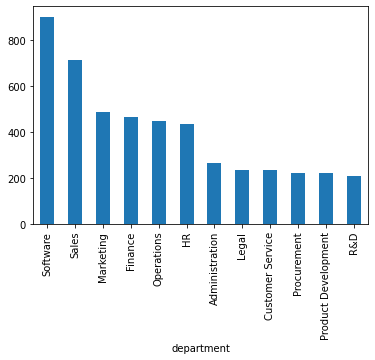

In [14]:
employees_df['department'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='gender'>

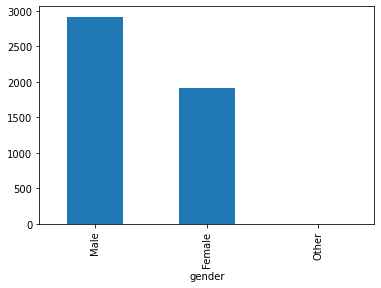

In [15]:
employees_df['gender'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='sexual_orientation'>

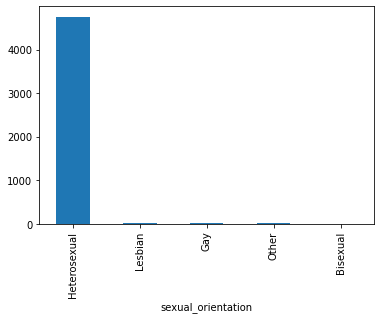

In [16]:
employees_df['sexual_orientation'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='race'>

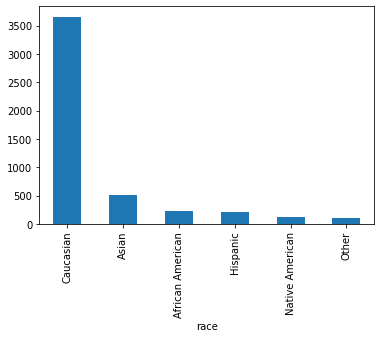

In [17]:
employees_df['race'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='location'>

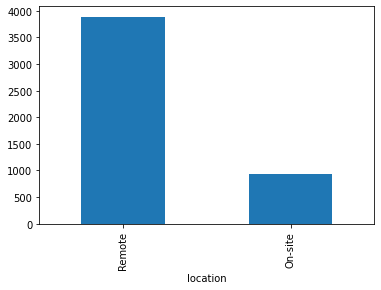

In [18]:
employees_df['location'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='location_city'>

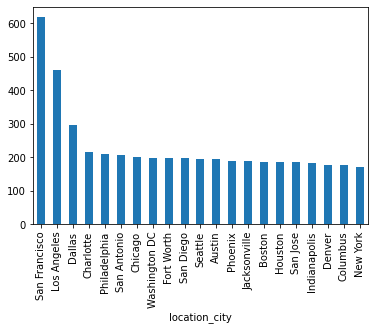

In [19]:
employees_df['location_city'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='marital_status'>

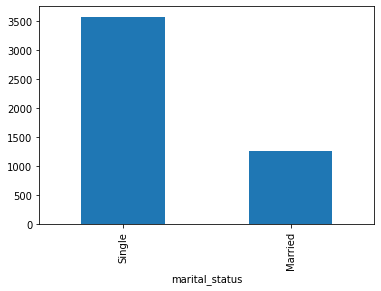

In [20]:
employees_df['marital_status'].value_counts().plot(kind='bar') 

<AxesSubplot:>

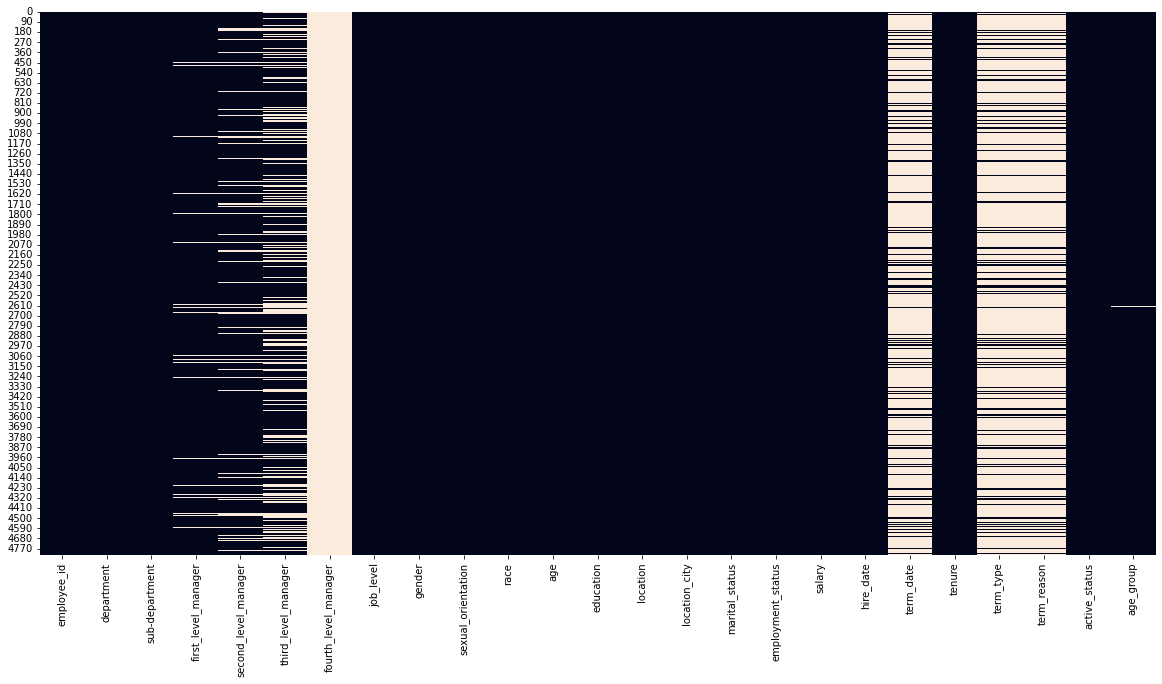

In [21]:
fig, ax = plt.subplots(figsize=(20,10))        
# sns.heatmap(df1.iloc[:, 1:6:], annot=True, linewidths=.5, ax=ax)

sns.heatmap(employees_df.isnull(), cbar = False, ax=ax)

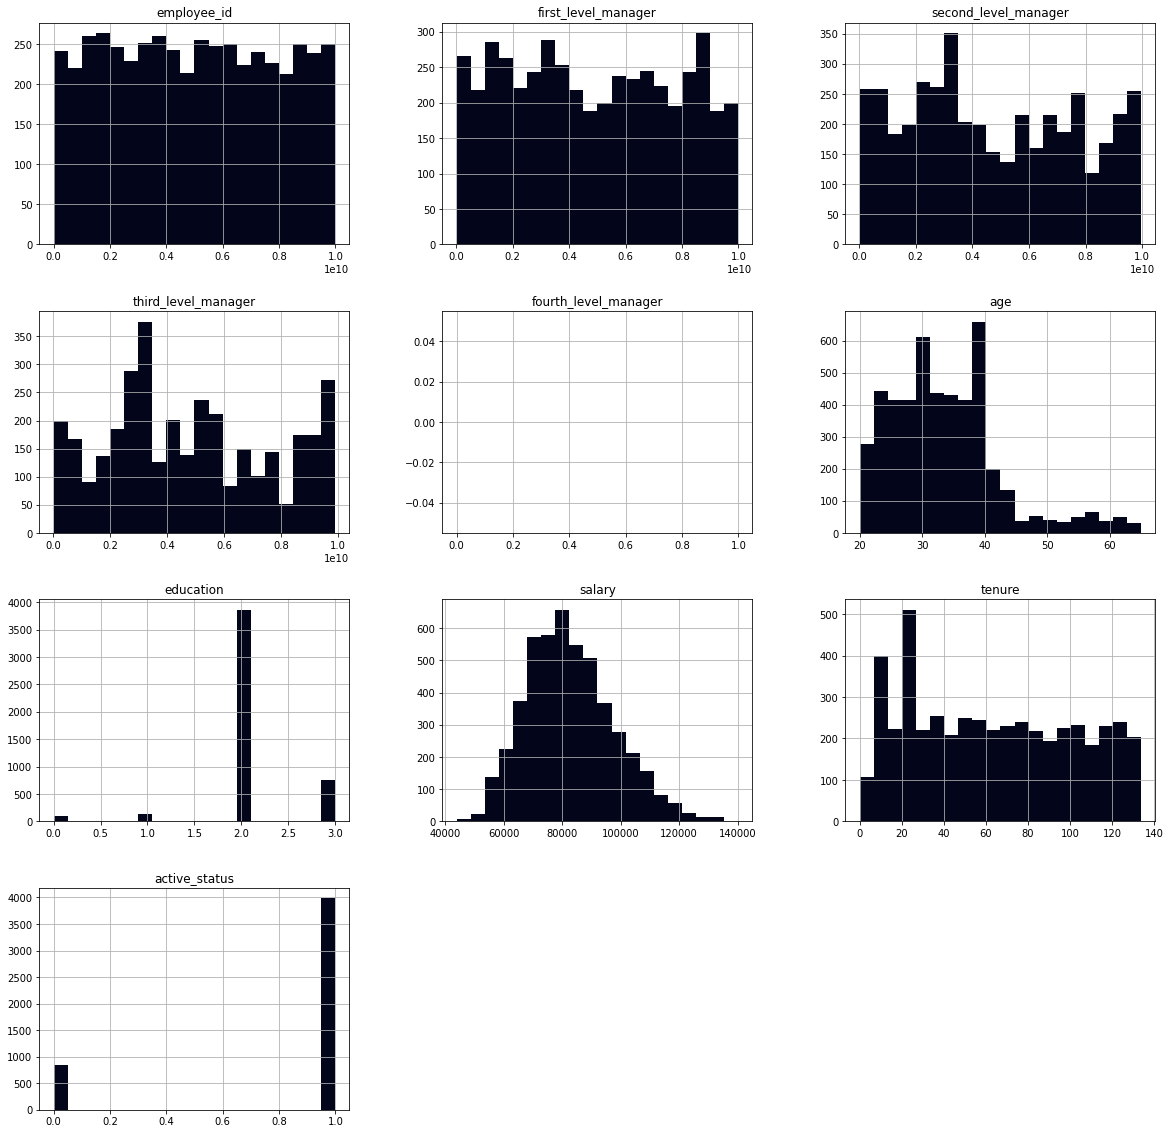

In [22]:
employees_df.hist(bins = 20, figsize=(20,20), color = '#03051a');

In [23]:
left_df = employees_df[employees_df['active_status'] == 0]
stayed_df = employees_df[employees_df['active_status'] == 1]

In [24]:
print('Total = ', len(employees_df))
print('Número de funcionários que saíram da empresa = ', len(left_df))
print('Porcentagem de funcionários que saíram da empresa = ', (len(left_df) / len(employees_df)) * 100)
print('Número de funcionários que ficaram na empresa = ', len(stayed_df))
print('Porcentagem de funcionários que ficaram na empresa = ', (len(stayed_df) / len(employees_df)) * 100)

Total =  4831
Número de funcionários que saíram da empresa =  851
Porcentagem de funcionários que saíram da empresa =  17.61540053819085
Número de funcionários que ficaram na empresa =  3980
Porcentagem de funcionários que ficaram na empresa =  82.38459946180915


#### Dentro das pessoas que sairam da empresa, quantos/quais foram involuntários e voluntários? 

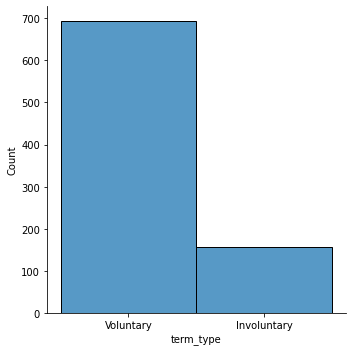

In [25]:
# left_df['term_type'].hist();

sns.displot(left_df, x="term_type");

#### Quais foram os principais motivos de saída da empresa?

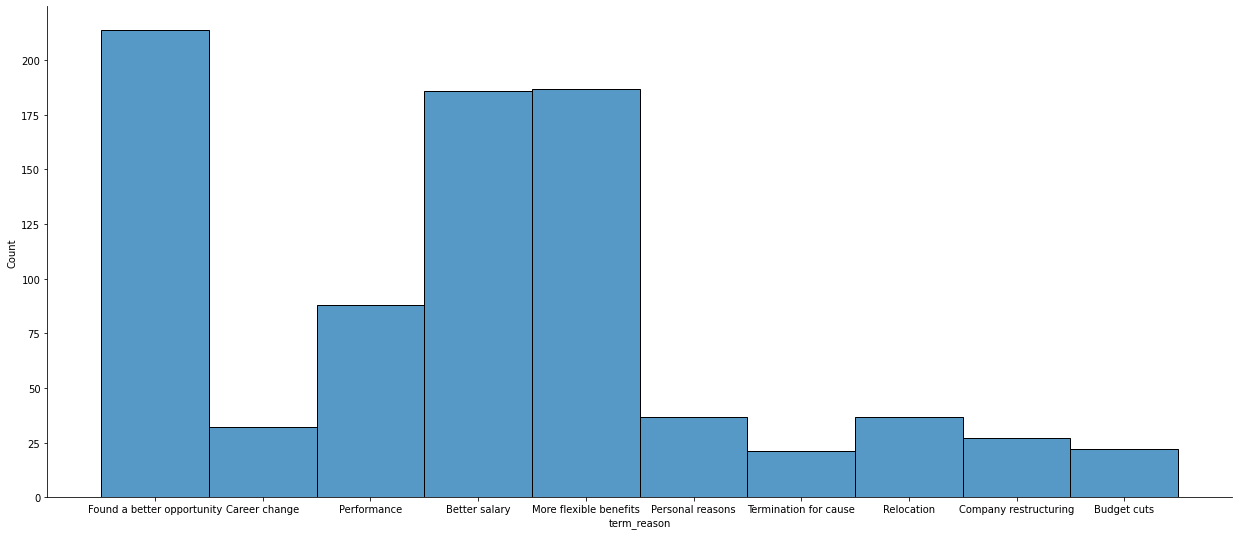

In [26]:
# plt.figure(figsize=[30,10])
ax = sns.displot(left_df, x="term_reason")
ax.figure.set_size_inches(20,8)

#### Existe uma relação se o modelo de trabalho remoto/presencial atrai ou afasta funcionários?

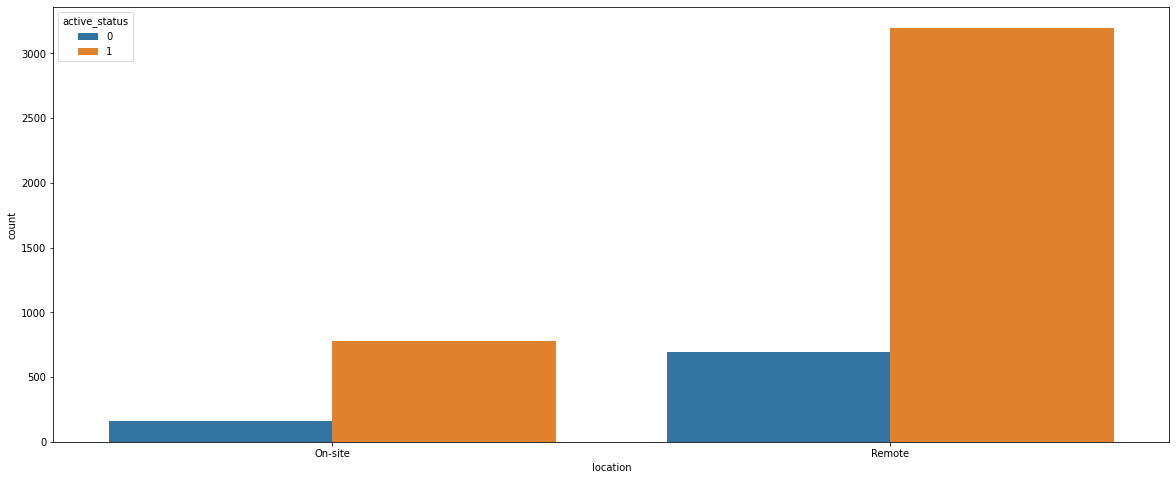

In [27]:
ax = sns.countplot(x = 'location', hue = 'active_status', data = employees_df)

ax.figure.set_size_inches(20,8)

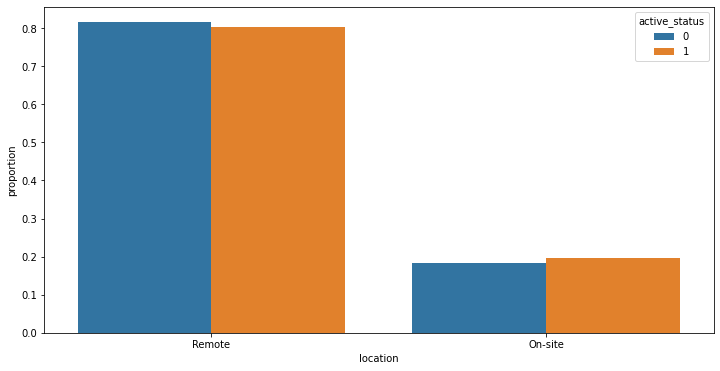

In [28]:
plt.figure(figsize=(12,6))
x, y, hue = "location", "proportion", "active_status"

(employees_df[x]
 .groupby(employees_df[hue])
 .value_counts(normalize=True)
#  .rename(y)
 .reset_index()
 .pipe(sns.barplot, x=x, y=y, hue=hue)
);

#### Análise de ternure e idade comparado aos que saíram ou deixaram a empresa

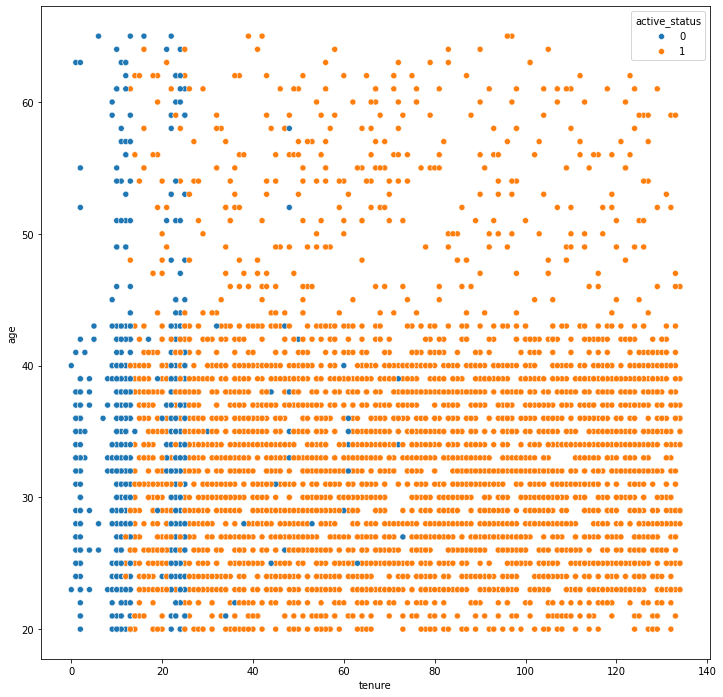

In [29]:
plt.figure(figsize=(12,12))
sns.scatterplot(data=employees_df, x="tenure", y="age", hue="active_status");

#### Como a localização geográfica afeta a empresa, a atração de talentos e as saídas de funcionários?

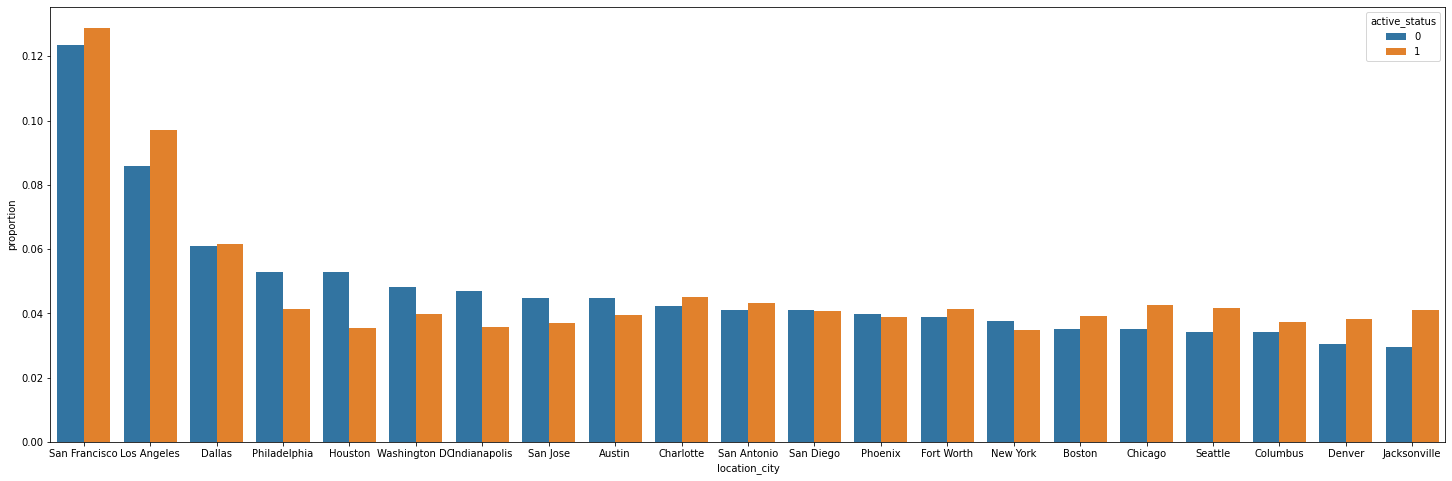

In [30]:
plt.figure(figsize=(25,8))
x, y, hue = "location_city", "proportion", "active_status"

(employees_df[x]
 .groupby(employees_df[hue])
 .value_counts(normalize=True)
#  .rename(y)
 .reset_index()
 .pipe(sns.barplot, x=x, y=y, hue=hue)
);

#### A orientação sexual impacta na saída de funcionários da empresa?

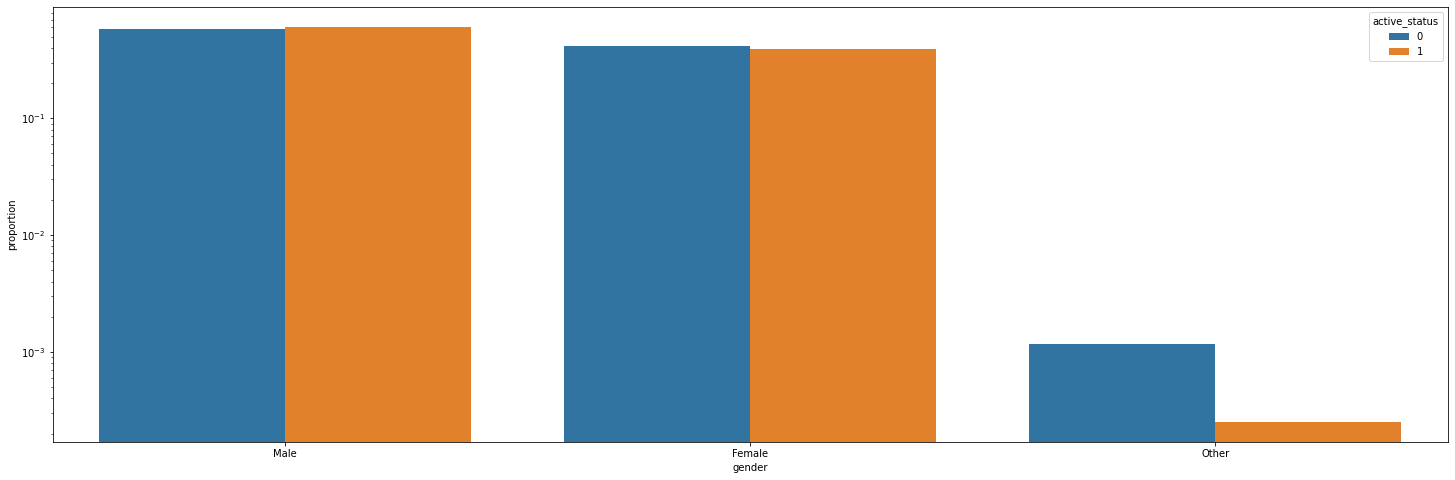

In [31]:
plt.figure(figsize=(25,8))
plt.yscale("log")
x, y, hue = "gender", "proportion", "active_status"

(employees_df[x]
 .groupby(employees_df[hue])
 .value_counts(normalize=True)
#  .rename(y)
 .reset_index()
 .pipe(sns.barplot, x=x, y=y, hue=hue)
);

#### Existe uma correlação o salário e outros fatores, como idade, experiência ou grau de educação?

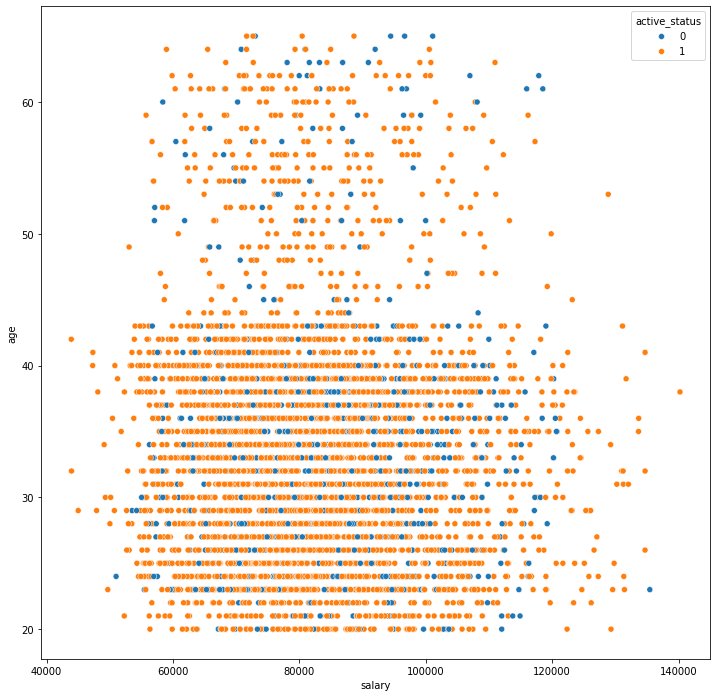

In [32]:
plt.figure(figsize=(12,12))
sns.scatterplot(data=employees_df, x="salary", y="age", hue="active_status");

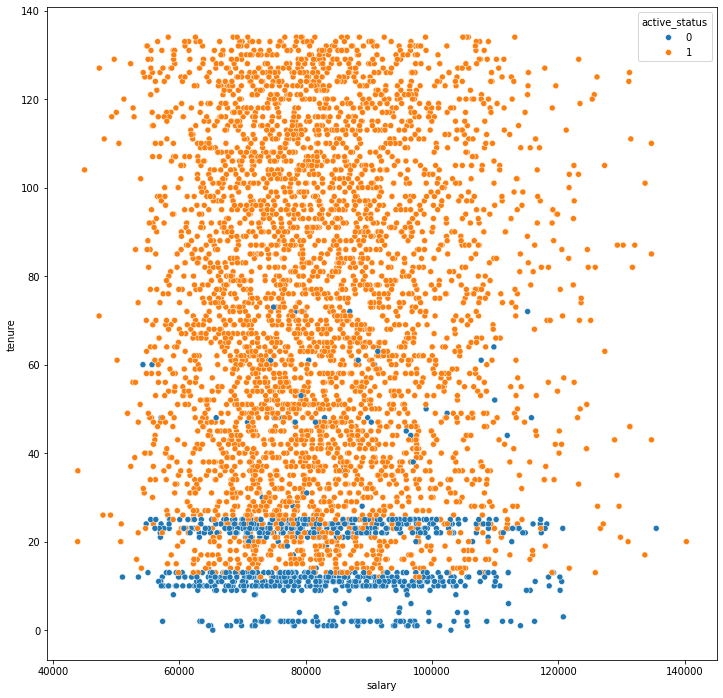

In [33]:
plt.figure(figsize=(12,12))
sns.scatterplot(data=employees_df, x="salary", y="tenure", hue="active_status");

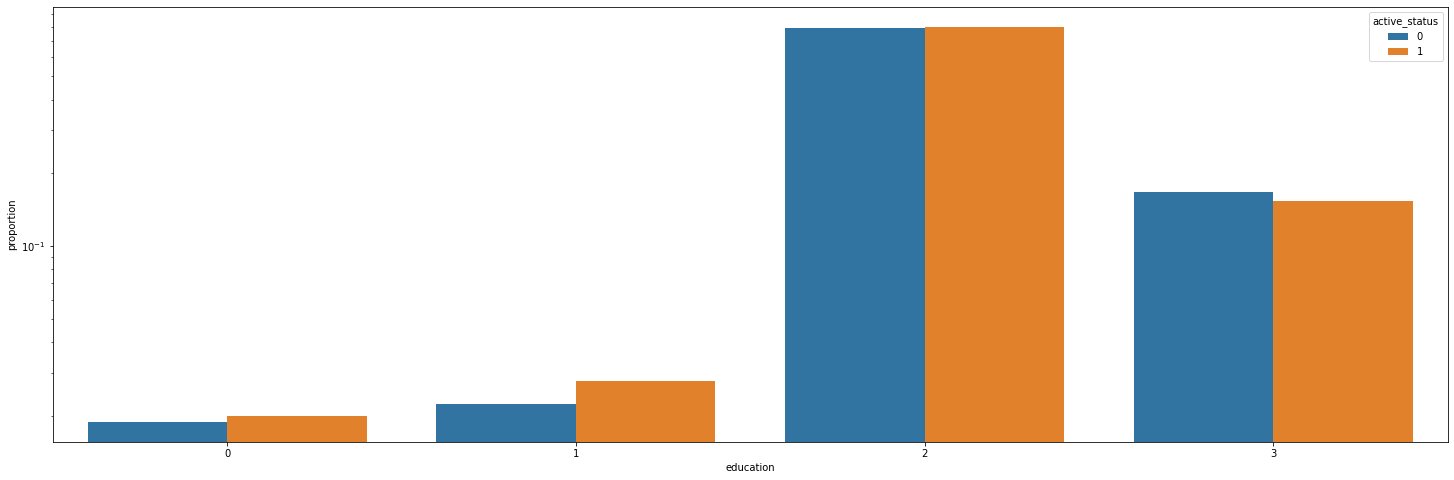

In [34]:
plt.figure(figsize=(25,8))
plt.yscale("log")
x, y, hue = "education", "proportion", "active_status"

(employees_df[x]
 .groupby(employees_df[hue])
 .value_counts(normalize=True)
#  .rename(y)
 .reset_index()
 .pipe(sns.barplot, x=x, y=y, hue=hue)
);

#### Há uma correlação entre a idade dos funcionários e a preferência pelo trabalho remoto?

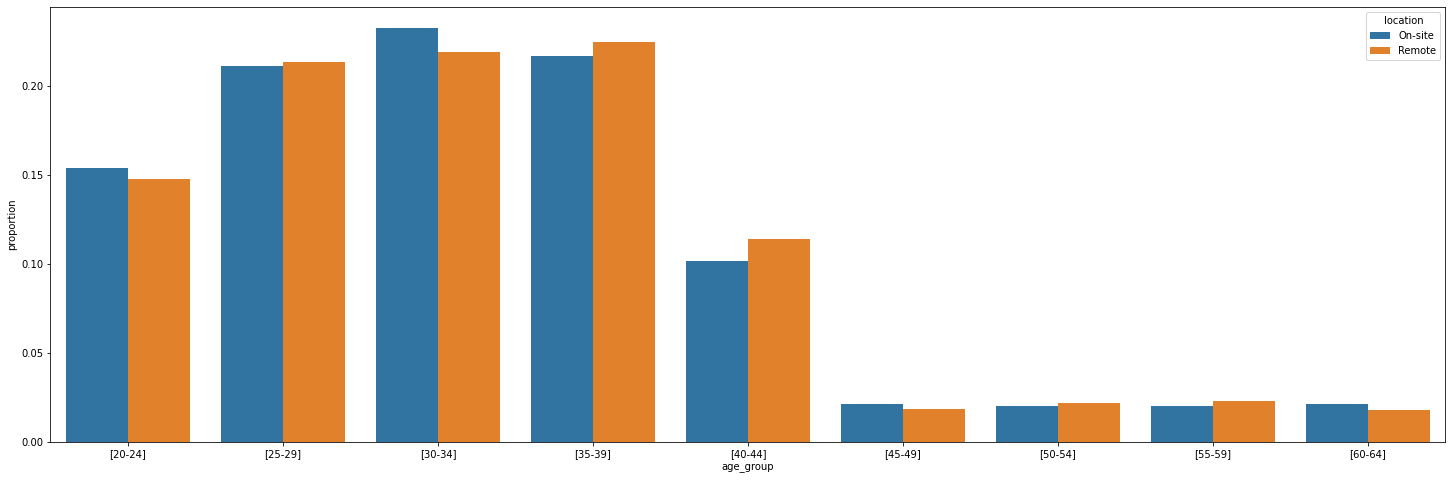

In [35]:
plt.figure(figsize=(25,8))
# plt.yscale("log")
x, y, hue = "age_group", "proportion", "location"

(employees_df[x]
 .groupby(employees_df[hue])
 .value_counts(normalize=True)
#  .rename(y)
 .reset_index()
 .pipe(sns.barplot, x=x, y=y, hue=hue)
);

In [36]:
employees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4831 entries, 0 to 4830
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   employee_id           4831 non-null   int64   
 1   department            4831 non-null   object  
 2   sub-department        4831 non-null   object  
 3   first_level_manager   4706 non-null   float64 
 4   second_level_manager  4260 non-null   float64 
 5   third_level_manager   3507 non-null   float64 
 6   fourth_level_manager  0 non-null      float64 
 7   job_level             4831 non-null   object  
 8   gender                4831 non-null   object  
 9   sexual_orientation    4831 non-null   object  
 10  race                  4831 non-null   object  
 11  age                   4831 non-null   int64   
 12  education             4831 non-null   int64   
 13  location              4831 non-null   object  
 14  location_city         4831 non-null   object  
 15  mari

In [37]:
employees_df['employment_status']

0       Full Time
1       Full Time
2       Full Time
3       Full Time
4       Full Time
          ...    
4826    Full Time
4827    Full Time
4828    Full Time
4829    Full Time
4830    Full Time
Name: employment_status, Length: 4831, dtype: object

In [43]:
X = employees_df[['department', 'job_level', 'gender', 'sexual_orientation', 'race',
                         'age', 'education', 'location', 'location_city', 'marital_status', 'employment_status',
                         'salary']]
X

,department,job_level,gender,sexual_orientation,race,age,education,location,location_city,marital_status,employment_status,salary
0,HR,Individual Contributor,Female,Heterosexual,African American,35,3,On-site,Los Angeles,Single,Full Time,51815
1,Software,Individual Contributor,Male,Heterosexual,Caucasian,21,2,Remote,Boston,Single,Full Time,81291
2,HR,Individual Contributor,Female,Heterosexual,Caucasian,34,3,On-site,Dallas,Single,Full Time,80893
3,HR,Team Lead,Male,Heterosexual,Caucasian,24,2,Remote,Denver,Married,Full Time,74519
4,HR,Individual Contributor,Female,Heterosexual,African American,29,2,Remote,Charlotte,Single,Full Time,54835
...,...,...,...,...,...,...,...,...,...,...,...,...
4826,Operations,Individual Contributor,Female,Heterosexual,Asian,39,1,Remote,Philadelphia,Married,Full Time,63735
4827,Marketing,Individual Contributor,Female,Heterosexual,Hispanic,38,2,On-site,Los Angeles,Single,Full Time,87063
4828,Software,Individual Contributor,Male,Heterosexual,Caucasian,34,2,Remote,Phoenix,Single,Full Time,107528
4829,Sales,Manager,Male,Heterosexual,Caucasian,35,2,Remote,Phoenix,Married,Full Time,82167


In [45]:
X_num = X[['age', 'education','salary']]
X_num

,age,education,salary
0,35,3,51815
1,21,2,81291
2,34,3,80893
3,24,2,74519
4,29,2,54835
...,...,...,...
4826,39,1,63735
4827,38,2,87063
4828,34,2,107528
4829,35,2,82167


In [47]:
X_cat = X[['department', 'job_level','gender', 'sexual_orientation', 'race', 'location', 'location_city', 'marital_status','employment_status' ]]
X_cat

,department,job_level,gender,sexual_orientation,race,location,location_city,marital_status,employment_status
0,HR,Individual Contributor,Female,Heterosexual,African American,On-site,Los Angeles,Single,Full Time
1,Software,Individual Contributor,Male,Heterosexual,Caucasian,Remote,Boston,Single,Full Time
2,HR,Individual Contributor,Female,Heterosexual,Caucasian,On-site,Dallas,Single,Full Time
3,HR,Team Lead,Male,Heterosexual,Caucasian,Remote,Denver,Married,Full Time
4,HR,Individual Contributor,Female,Heterosexual,African American,Remote,Charlotte,Single,Full Time
...,...,...,...,...,...,...,...,...,...
4826,Operations,Individual Contributor,Female,Heterosexual,Asian,Remote,Philadelphia,Married,Full Time
4827,Marketing,Individual Contributor,Female,Heterosexual,Hispanic,On-site,Los Angeles,Single,Full Time
4828,Software,Individual Contributor,Male,Heterosexual,Caucasian,Remote,Phoenix,Single,Full Time
4829,Sales,Manager,Male,Heterosexual,Caucasian,Remote,Phoenix,Married,Full Time


In [49]:
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()

In [39]:
y = employees_df['active_status']
y

0       1
1       1
2       1
3       1
4       1
       ..
4826    1
4827    1
4828    0
4829    1
4830    0
Name: active_status, Length: 4831, dtype: int64

In [41]:
d_tree = DecisionTreeClassifier()

In [42]:
d_tree.fit(X, y)

ValueError: could not convert string to float: 'HR'